<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Explore-The-Dataset" data-toc-modified-id="Challenge-1---Explore-The-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Explore The Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-data-from-an-bird's-eye-view." data-toc-modified-id="Explore-the-data-from-an-bird's-eye-view.-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the data from an bird's-eye view.</a></span></li><li><span><a href="#Next,-evaluate-if-the-columns-in-this-dataset-are-strongly-correlated." data-toc-modified-id="Next,-evaluate-if-the-columns-in-this-dataset-are-strongly-correlated.-2.0.0.2"><span class="toc-item-num">2.0.0.2&nbsp;&nbsp;</span>Next, evaluate if the columns in this dataset are strongly correlated.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Remove-Column-Collinearity." data-toc-modified-id="Challenge-2---Remove-Column-Collinearity.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Remove Column Collinearity.</a></span></li><li><span><a href="#Challenge-3---Handle-Missing-Values" data-toc-modified-id="Challenge-3---Handle-Missing-Values-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Handle Missing Values</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-the-cells-below,-handle-the-missing-values-from-the-dataset.-Remember-to-comment-the-rationale-of-your-decisions." data-toc-modified-id="In-the-cells-below,-handle-the-missing-values-from-the-dataset.-Remember-to-comment-the-rationale-of-your-decisions.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.</a></span></li><li><span><a href="#Again,-examine-the-number-of-missing-values-in-each-column." data-toc-modified-id="Again,-examine-the-number-of-missing-values-in-each-column.-4.0.0.2"><span class="toc-item-num">4.0.0.2&nbsp;&nbsp;</span>Again, examine the number of missing values in each column.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Handle-WHOIS_*-Categorical-Data" data-toc-modified-id="Challenge-4---Handle-WHOIS_*-Categorical-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Handle <code>WHOIS_*</code> Categorical Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-the-cells-below,-fix-the-country-values-as-intructed-above." data-toc-modified-id="In-the-cells-below,-fix-the-country-values-as-intructed-above.-5.0.0.1"><span class="toc-item-num">5.0.0.1&nbsp;&nbsp;</span>In the cells below, fix the country values as intructed above.</a></span></li><li><span><a href="#If-a-limited-number-of-values-account-for-the-majority-of-data,-we-can-retain-these-top-values-and-re-label-all-other-rare-values." data-toc-modified-id="If-a-limited-number-of-values-account-for-the-majority-of-data,-we-can-retain-these-top-values-and-re-label-all-other-rare-values.-5.0.0.2"><span class="toc-item-num">5.0.0.2&nbsp;&nbsp;</span>If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.</a></span></li><li><span><a href="#After-verifying,-now-let's-keep-the-top-10-values-of-the-column-and-re-label-other-columns-with-OTHER." data-toc-modified-id="After-verifying,-now-let's-keep-the-top-10-values-of-the-column-and-re-label-other-columns-with-OTHER.-5.0.0.3"><span class="toc-item-num">5.0.0.3&nbsp;&nbsp;</span>After verifying, now let's keep the top 10 values of the column and re-label other columns with <code>OTHER</code>.</a></span></li><li><span><a href="#In-the-next-cell,-drop-['WHOIS_STATEPRO',-'WHOIS_REGDATE',-'WHOIS_UPDATED_DATE']." data-toc-modified-id="In-the-next-cell,-drop-['WHOIS_STATEPRO',-'WHOIS_REGDATE',-'WHOIS_UPDATED_DATE'].-5.0.0.4"><span class="toc-item-num">5.0.0.4&nbsp;&nbsp;</span>In the next cell, drop <code>['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']</code>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-5---Handle-Remaining-Categorical-Data-&amp;-Convert-to-Ordinal" data-toc-modified-id="Challenge-5---Handle-Remaining-Categorical-Data-&amp;-Convert-to-Ordinal-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Handle Remaining Categorical Data &amp; Convert to Ordinal</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#URL-is-easy.-We'll-simply-drop-it-because-it-has-too-many-unique-values-that-there's-no-way-for-us-to-consolidate." data-toc-modified-id="URL-is-easy.-We'll-simply-drop-it-because-it-has-too-many-unique-values-that-there's-no-way-for-us-to-consolidate.-6.0.0.1"><span class="toc-item-num">6.0.0.1&nbsp;&nbsp;</span><code>URL</code> is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.</a></span></li><li><span><a href="#Print-the-unique-value-counts-of-CHARSET.-You-see-there-are-only-a-few-unique-values.-So-we-can-keep-it-as-it-is." data-toc-modified-id="Print-the-unique-value-counts-of-CHARSET.-You-see-there-are-only-a-few-unique-values.-So-we-can-keep-it-as-it-is.-6.0.0.2"><span class="toc-item-num">6.0.0.2&nbsp;&nbsp;</span>Print the unique value counts of <code>CHARSET</code>. You see there are only a few unique values. So we can keep it as it is.</a></span></li><li><span><a href="#Before-you-think-of-your-own-solution,-don't-read-the-instructions-that-come-next." data-toc-modified-id="Before-you-think-of-your-own-solution,-don't-read-the-instructions-that-come-next.-6.0.0.3"><span class="toc-item-num">6.0.0.3&nbsp;&nbsp;</span>Before you think of your own solution, don't read the instructions that come next.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-6---Modeling,-Prediction,-and-Evaluation" data-toc-modified-id="Challenge-6---Modeling,-Prediction,-and-Evaluation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Modeling, Prediction, and Evaluation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-this-lab,-we-will-try-two-different-models-and-compare-our-results." data-toc-modified-id="In-this-lab,-we-will-try-two-different-models-and-compare-our-results.-7.0.0.1"><span class="toc-item-num">7.0.0.1&nbsp;&nbsp;</span>In this lab, we will try two different models and compare our results.</a></span></li><li><span><a href="#Our-second-algorithm-is-is-DecisionTreeClassifier" data-toc-modified-id="Our-second-algorithm-is-is-DecisionTreeClassifier-7.0.0.2"><span class="toc-item-num">7.0.0.2&nbsp;&nbsp;</span>Our second algorithm is is DecisionTreeClassifier</a></span></li><li><span><a href="#We'll-create-another-DecisionTreeClassifier-model-with-max_depth=5." data-toc-modified-id="We'll-create-another-DecisionTreeClassifier-model-with-max_depth=5.-7.0.0.3"><span class="toc-item-num">7.0.0.3&nbsp;&nbsp;</span>We'll create another DecisionTreeClassifier model with max_depth=5.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Bonus-Challenge---Feature-Scaling" data-toc-modified-id="Bonus-Challenge---Feature-Scaling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge - Feature Scaling</a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [686]:
# Import your libraries:

import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

Your features will be:

+ URL: it is the anonymous identification of the URL analyzed in the study
+ URL_LENGTH: it is the number of characters in the URL
+ NUMBER_SPECIAL_CHARACTERS: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”
+ CHARSET: it is a categorical value and its meaning is the character encoding standard (also called character set).
+ SERVER: it is a categorical value and its meaning is the operative system of the server got from the packet response.
+ CONTENT_LENGTH: it represents the content size of the HTTP header.
+ WHOIS_COUNTRY: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).
+ WHOIS_STATEPRO: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).
+ WHOIS_REGDATE: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM
+ WHOIS_UPDATED_DATE: Through the Whois we got the last update date from the server analyzed
+ TCP_CONVERSATION_EXCHANGE: This variable is the number of TCP packets exchanged between the server and our honeypot client
+ DIST_REMOTE_TCP_PORT: it is the number of the ports detected and different to TCP
+ REMOTE_IPS: this variable has the total number of IPs connected to the honeypot
+ APP_BYTES: this is the number of bytes transfered
+ SOURCE_APP_PACKETS: packets sent from the honeypot to the server
+ REMOTE_APP_PACKETS: packets received from the server
+ APP_PACKETS: this is the total number of IP packets generated during the communication between the honeypot and the server
+ DNS_QUERY_TIMES: this is the number of DNS packets generated during the communication between the honeypot and the server
+ TYPE: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:


*Source: [kaggle](https://www.kaggle.com/viratkothari/malicious-and-benign-websites-classification)*

In [687]:
import pandas as pd
import numpy as np

websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [688]:
print(websites.describe())
websites.head()

        URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH  \
count  1781.000000                1781.000000      969.000000   
mean     56.961258                  11.111735    11726.927761   
std      27.555586                   4.549896    36391.809051   
min      16.000000                   5.000000        0.000000   
25%      39.000000                   8.000000      324.000000   
50%      49.000000                  10.000000     1853.000000   
75%      68.000000                  13.000000    11323.000000   
max     249.000000                  43.000000   649263.000000   

       TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT   REMOTE_IPS  \
count                1781.000000           1781.000000  1781.000000   
mean                   16.261089              5.472768     3.060640   
std                    40.500975             21.807327     3.386975   
min                     0.000000              0.000000     0.000000   
25%                     0.000000              0.000000     

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [689]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [690]:
data = websites[['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES']]

In [691]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
target = websites['Type']

In [692]:
# 0 for bening 1 for maliciuos websites
websites.Type

0       1
1       0
2       0
3       0
4       0
       ..
1776    1
1777    1
1778    0
1779    0
1780    0
Name: Type, Length: 1781, dtype: int64

In [693]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [694]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
# Columns: 'URL', 'CHARSET', 'SERVER, 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE' 
# are type object and cannot be transform into numeric data.

# We could transform them into 1 is they have any info, 0 if NaN.


#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

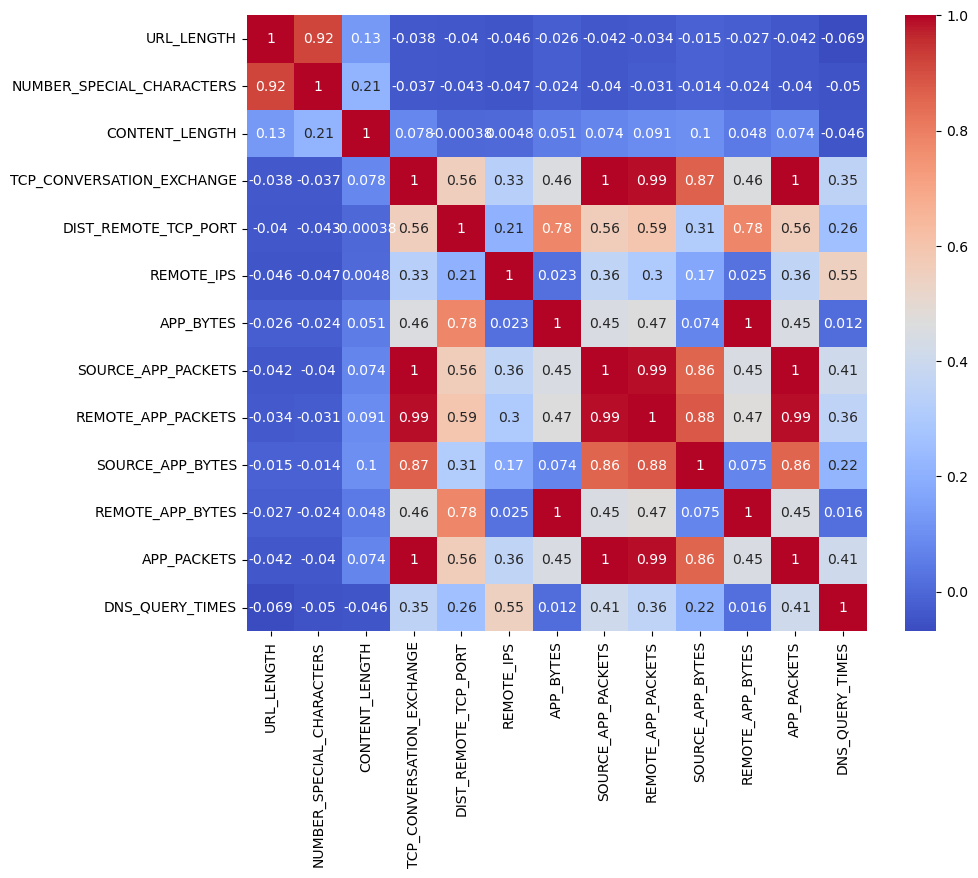

In [695]:
# select numeric columns
data_numerical = data._get_numeric_data()   

# Step 2: Create the correlation matrix
correlation_matrix = data_numerical.corr()

# Step 3: Display the correlation matrix
# Create a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# 4. Comment on which columns you might need to remove due to high collinearity.
# Hgih collinearity mean coef > 0.8

# Columns with high collinearity:
# 'URL_LENGTH' - 'NUMBER_OF_SPECIAL_CHARACTHERS'  
#### Drop 'NUMBER_OF_SPECIAL_CHARACTHERS' ####
# 'TCP_CONVERSION_EXCHANGE' - 'SOURCE_APP_PACKETS' 
# 'TCP_CONVERSION_EXCHANGE' - 'REMOTE_APP_PACKETS'
# 'TCP_CONVERSION_EXCHANGE' - 'SOURCE_APP_BYTES'
# 'TCP_CONVERSION_EXCHANGE' - 'APP_PACKETS'
#### Drop all 4 columns ####
# 'APP_BYTES' - 'REMOTE_APP_BYTES'
# 'SOURCE_APP_PACKETS' - 'REMOTE_APP_PACKETS'
# 'SOURCE_APP_PACKETS' - 'SOURCE_APP_BYTES'
# 'SOURCE_APP_PACKETS' - 'APP_PACKETS'
# 'REMOTE_APP_PACKETS' - 'SOURCE_APP_BYTES'
# 'REMOTE_APP_PACKETS' - 'APP_PACKETS'
# 'SOURCE_APP_BYTES' - 'APP_PACKETS'


### This is an example to know the feacture importance using a ML model

In [696]:
#! pip install xgboost

In [697]:
# Define X and y matrixes
X = data_numerical._get_numeric_data().drop(['SOURCE_APP_PACKETS','REMOTE_APP_PACKETS', 'REMOTE_APP_BYTES', 'APP_PACKETS'], axis=1)
y = websites.Type

# check the shape for compatibility
X.shape, y.shape

# Define train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [698]:
import xgboost as xgb
# initialize our xgboost model
model = xgb.XGBRegressor()

# Fit our model
model.fit(X_train, y_train)




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [699]:
sort_idx = model.feature_importances_.argsort()

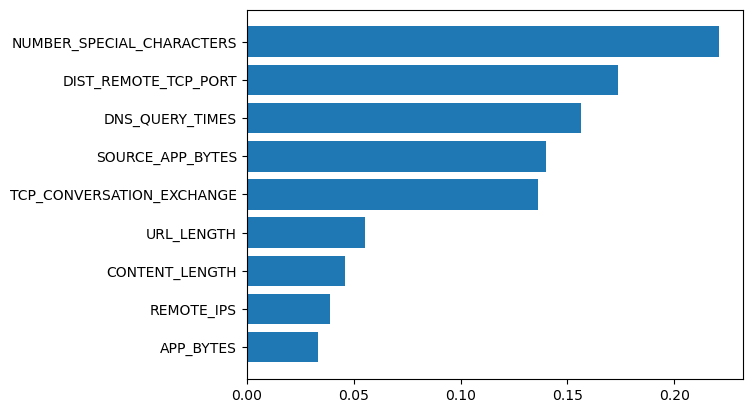

In [700]:
plt.barh(X.columns[sort_idx],model.feature_importances_[sort_idx])
plt.show()

    In the previous plot we can see the feactures with lower weight in the dataset.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [701]:
# Your code here

In [702]:
data_numerical.isna()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,False,False,True,False,False,False,False,False,False,False,False,False,False
1777,False,False,True,False,False,False,False,False,False,False,False,False,False
1778,False,False,False,False,False,False,False,False,False,False,False,False,False
1779,False,False,True,False,False,False,False,False,False,False,False,False,False


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [703]:
# a: Check for missing values
# Check for missing values in the DataFrame
missing_values = pd.isnull(data_numerical)

# Count missing values in each column
missing_counts = missing_values.sum()

# Count columns with missing values
columns_with_missing = missing_counts[missing_counts > 0].count()

# Check if all columns have missing values
all_columns_missing = missing_counts.all()

# Calculate the total number of missing values
total_missing_values = missing_counts.sum()

# Display the results
print("Missing Values in Each Column:\n", missing_counts)
print("\nNumber of Columns with Missing Values:", columns_with_missing)
print("All Columns Have Missing Values:", all_columns_missing)
print("\nTotal Missing Values in the DataFrame:", total_missing_values)

Missing Values in Each Column:
 URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CONTENT_LENGTH               812
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
dtype: int64

Number of Columns with Missing Values: 2
All Columns Have Missing Values: False

Total Missing Values in the DataFrame: 813


In [704]:
# column 'CONTENT_LENGTH' HAS MORE THAN 50% MISSING VALUES
data_numerical = data_numerical.drop('CONTENT_LENGTH', axis=1)


In [705]:
# Now we will drop the rows with missing data
data_numerical_cleaned = data_numerical.dropna(inplace=True)


#### Again, examine the number of missing values in each column. 

    If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [706]:
# a: Check for missing values
# Check for missing values in the DataFrame
missing_values = pd.isnull(data_numerical)

# Count missing values in each column
missing_counts = missing_values.sum()

# Count columns with missing values
columns_with_missing = missing_counts[missing_counts > 0].count()

# Check if all columns have missing values
all_columns_missing = missing_counts.all()

# Calculate the total number of missing values
total_missing_values = missing_counts.sum()

# Display the results
print("Missing Values in Each Column:\n", missing_counts)
print("\nNumber of Columns with Missing Values:", columns_with_missing)
print("All Columns Have Missing Values:", all_columns_missing)
print("\nTotal Missing Values in the DataFrame:", total_missing_values)

Missing Values in Each Column:
 URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
dtype: int64

Number of Columns with Missing Values: 0
All Columns Have Missing Values: False

Total Missing Values in the DataFrame: 0


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [707]:
websites.WHOIS_COUNTRY.value_counts()
websites.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [708]:
# a: Check for missing values
# Check for missing values in the DataFrame
missing_values = pd.isnull(websites)

# Count missing values in each column
missing_counts = missing_values.sum()

# Count columns with missing values
columns_with_missing = missing_counts[missing_counts > 0].count()

# Check if all columns have missing values
all_columns_missing = missing_counts.all()

# Calculate the total number of missing values
total_missing_values = missing_counts.sum()

# eliminate the missing values
websites.dropna(inplace=True)

# Display the results
print("Missing Values in Each Column:\n", missing_counts)
print("\nNumber of Columns with Missing Values:", columns_with_missing)
print("All Columns Have Missing Values:", all_columns_missing)
print("\nTotal Missing Values in the DataFrame:", total_missing_values)

Missing Values in Each Column:
 URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

Number of Columns with Missing Values: 8
All Columns Have Missing Values: False

Total Missing Values in the DataFrame: 1930


In [709]:
# Your code here
good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(lambda x : good_country[x])

In [710]:
websites.WHOIS_COUNTRY.unique()

array(['US', 'RU', 'AU', 'CA', 'PA', 'UK', 'IN', 'UG', 'JP', 'SI', 'AT',
       'CN', 'KY', 'TR', 'SC', 'NL', 'UA', 'CH', 'HK', 'IL', 'DE', 'IT',
       'BS', 'NO', 'BE', 'BY', 'AE', 'IE', 'PH', 'UY'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [711]:
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(15,15))
    return plt.show()

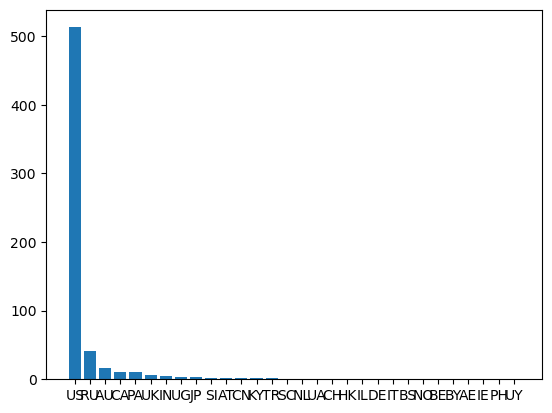

<Figure size 1500x1500 with 0 Axes>

In [712]:
print_bar_plot(websites.WHOIS_COUNTRY.unique(),websites.WHOIS_COUNTRY.value_counts())

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [713]:
index = 10
length = websites.shape[0]
for index in range(length):
    websites.iloc[index]['WHOIS_COUNTRY'] = 'other' 
    index +=1   




C:\Users\danis\AppData\Local\Temp\ipykernel_10548\2132497807.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  websites.iloc[index]['WHOIS_COUNTRY'] = 'other'


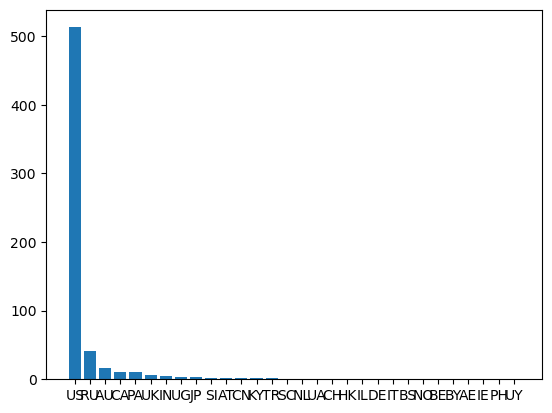

<Figure size 1500x1500 with 0 Axes>

In [714]:
print_bar_plot(websites.WHOIS_COUNTRY.unique(),websites.WHOIS_COUNTRY.value_counts())

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [715]:
websites.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)



# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [716]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [717]:
websites.drop('URL', axis=1, inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [718]:
print(websites['CHARSET'].unique())
print(websites['SERVER'].unique())

['ISO-8859-1' 'iso-8859-1' 'us-ascii' 'utf-8' 'UTF-8' 'windows-1251']
['nginx' 'Apache/2' 'Microsoft-HTTPAPI/2.0' 'Apache/2.4.7 (Ubuntu)'
 'Apache' 'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'Apache/2.2.22' 'Microsoft-IIS/7.5' 'nginx/1.12.0'
 'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'Apache/2.2.22 (Debian)' 'Apache/2.4.25 (Amazon) PHP/7.0.14' 'GSE'
 'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4'
 'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips' 'Apache/2.2.22 (Ubuntu)'
 'Apache/2.4.25'
 'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4'
 'Apache/2.4.6 (CentOS) PHP/5.6.8' 'AmazonS3' 'ATS' 'CherryPy/3.6.0'
 'Apache/2.2.15 (CentOS)' 'Apache/2.2.15 (Red Hat)'
 'Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40'
 'Apache/2.2.3 (CentOS)' 'Apache/2.4' 'Apache/2.4.10 (Debian)'
 'Apache/2.2.29 (Unix) mod_ssl/2.2.29 OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'mw2232.codfw.wmnet' 'Sucuri/Cloudpro

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [719]:
# keep the mayority


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [720]:

#To re-label the SERVER column so that it contains only Microsoft, Apache, nginx, and Other, you can use the following approach. This method checks if each value in the SERVER column contains the substrings "Microsoft", "Apache", or "nginx", and labels them accordingly. If none of these substrings are found, it labels the value as "Other".

# Convert SERVER values to lowercase for consistent comparison
websites['SERVER'] = websites['SERVER'].str.lower()

# Define a function to classify the server types
def classify_server(server):
    if pd.isna(server):
        return 'Other'
    elif 'microsoft' in server:
        return 'Microsoft'
    elif 'apache' in server:
        return 'Apache'
    elif 'nginx' in server:
        return 'nginx'
    else:
        return 'Other'

# Apply the function to the SERVER column
websites['SERVER'] = websites['SERVER'].apply(classify_server)

# Check the unique values in the SERVER column
print(websites['SERVER'].unique())


['nginx' 'Apache' 'Microsoft' 'Other']


In [721]:
websites.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
3,17,6,ISO-8859-1,nginx,162.0,US,31,22,3,3812,39,37,18784,4380,39,8.0,0
6,18,6,iso-8859-1,Apache,345.0,US,12,0,3,1189,14,13,8559,1327,14,2.0,0
7,19,6,us-ascii,Microsoft,324.0,US,0,0,0,0,0,0,0,0,0,0.0,0
11,20,6,us-ascii,Microsoft,324.0,US,0,0,0,0,0,0,0,0,0,0.0,0
16,21,7,iso-8859-1,nginx,686.0,RU,6,0,2,603,8,9,1580,745,8,2.0,1


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [722]:
websites_dummy = pd.get_dummies(websites, drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [723]:
websites_dummy.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,WHOIS_COUNTRY_PH,WHOIS_COUNTRY_RU,WHOIS_COUNTRY_SC,WHOIS_COUNTRY_SI,WHOIS_COUNTRY_TR,WHOIS_COUNTRY_UA,WHOIS_COUNTRY_UG,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US,WHOIS_COUNTRY_UY
3,17,6,162.0,31,22,3,3812,39,37,18784,...,False,False,False,False,False,False,False,False,True,False
6,18,6,345.0,12,0,3,1189,14,13,8559,...,False,False,False,False,False,False,False,False,True,False
7,19,6,324.0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
11,20,6,324.0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
16,21,7,686.0,6,0,2,603,8,9,1580,...,False,True,False,False,False,False,False,False,False,False


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [724]:
websites.columns

Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [725]:
from sklearn.model_selection import train_test_split

# define X and y matrices
X = websites_dummy.drop('Type', axis=1)
y = websites_dummy['Type']
print(X.shape, y.shape)

# Define train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Fit model
model.fit(X_train, y_train)

# Use the model
y_pred = model.predict(X_test)

(636, 50) (636,)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [726]:
logReg_model = LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [727]:
logReg_model.fit(X_train, y_train)
y_pred_logReg =logReg_model.predict(X_test)

c:\Users\danis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [728]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_logReg))
print(accuracy_score(y_test, y_pred_logReg))

[[170   2]
 [ 13   6]]
0.9214659685863874


What are your thoughts on the performance of the model? Write your conclusions below.

### Your conclusions here:
    The model is working fine but it have many errors in Type 2, it says that the model predict a non malicious web like a malicious web


#### Our second algorithm is is DecisionTreeClassifier

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `DecisionTreeClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where max_depth=3

In [729]:
from sklearn.tree import DecisionTreeClassifier

#initialize model
tree_model = DecisionTreeClassifier(max_depth=3)

# Fit model
tree_model.fit(X_train, y_train)

# Use the model
y_pred_tree = tree_model.predict(X_test)


To test your model, compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)

In [730]:
# Compute predicted probabilities
y_pred_tree_proba = tree_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Decide 0 or 1 using a threshold of 0.5
y_pred_tree = (y_pred_tree_proba >= 0.5).astype(int)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix:\n", conf_matrix)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
 [[168   4]
 [ 16   3]]
Accuracy: 0.90


#### We'll create another DecisionTreeClassifier model with max_depth=5. 
Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [731]:
#initialize model
tree_model_5 = DecisionTreeClassifier(max_depth=5)

# Fit model
tree_model_5.fit(X_train, y_train)

# Use the model
y_pred_tree_5 = tree_model_5.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_tree_5)
print("Confusion Matrix:\n", conf_matrix)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_tree_5)
print(f"Accuracy: {accuracy:.2f}")


Confusion Matrix:
 [[170   2]
 [ 18   1]]
Accuracy: 0.90


Did you see an improvement in the confusion matrix when increasing max_depth to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

yes, there was a small improvement when increasing depth to 5

### Your conclusions here:


<!-- Add your conclusion here -->

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [732]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X_train)

transformer.transform(X_train)

model_scaled = LogisticRegression()

model_scaled.fit(X_train, y_train)

# Use the model
y_pred_2 = model_scaled.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_2)
print("Confusion Matrix:\n", conf_matrix)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_2)
print(f"Accuracy: {accuracy:.2f}")




Confusion Matrix:
 [[170   2]
 [ 13   6]]
Accuracy: 0.92


c:\Users\danis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [733]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()

# Normalize the data
X = pd.DataFrame(normalizer.fit_transform(X), columns=X.columns)

# Define train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_normalized = LogisticRegression()

model_normalized.fit(X_train, y_train)

# Use the model
y_pred_norm = model_normalized.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_norm)
print("Confusion Matrix:\n", conf_matrix)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_norm)
print(f"Accuracy: {accuracy:.2f}")



Confusion Matrix:
 [[172   0]
 [ 19   0]]
Accuracy: 0.90


## Comments:

better accuracy for normalized dataframe than scaled on. both models more accurate than the previous ones